<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Agrupamento
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agrupamento;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre flores do gênero iris. A idéia é agrupar as flores de acordo com suas características físicas (variáveis preditivas). Lembre-se das aulas, nós já temos uma idéia dos agrupamentos.

In [15]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
iris = sns.load_dataset('iris')
iris = iris.drop(['species'], axis=1)

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **1.1. Analise exploratoria** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos da base de dados. Comente o que observou no gráfico.

 - Atributos preditivos:

/usr/lib/python3/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/lib/python3/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/lib/python3/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/lib/python3/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/lib/python3/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/lib/python3/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/lib/pytho

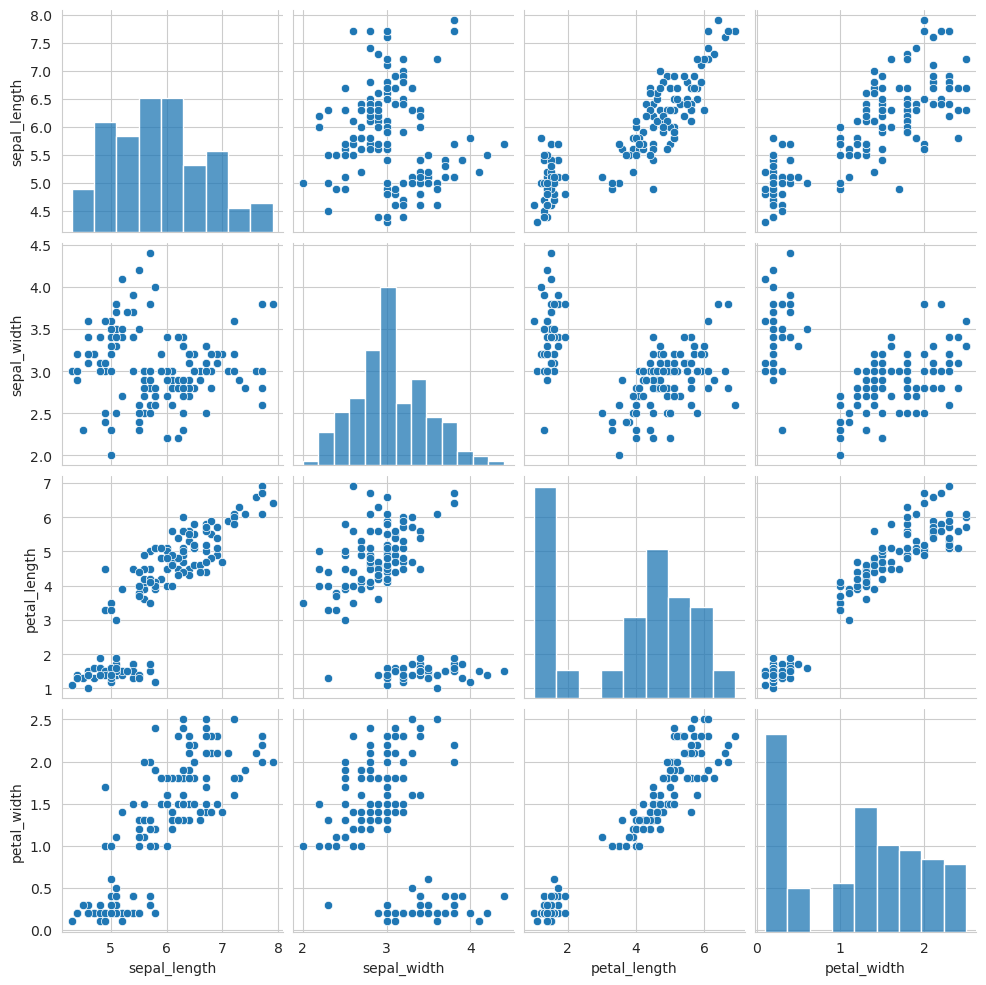

In [4]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=iris, palette="pastel")

**Comentário:** Neste gráfico percebemos que existem grupos bem definidos de espécies em algumas características. Observando o comprimento da pétala por exemplo, é nítida a presença de um grupo com números baixos. Outro grupo, que talvez seja o mesmo, possui sepálias com menor comprimento, outro conta com a largura em números menores. Mesmo fora dos grupos bem estabelecidos, é possível observar certo ordenamento dentro dos outros grupos menos organizados.

## 2\. Dados 

### **2.1. Valores nulos** 

Avalie se a base de dados possui valores faltantes, se sim, utilize os conceitos da aula para trata-los.

In [5]:
# Limpar dados

df = sns.load_dataset('iris')
df_limpo = df.dropna()
df_limpo.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### **2.2. Variáveis numéricas** 

Identifique se existe a necessidade de escalar as variáveis numéricas. Se sim, crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [10]:
# Normalizar dados
x = df.drop('species', axis=1)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
scaler

StandardScaler()

## 3\. Modelagem 

### **3.1. Treino** 

Treine 10 modelos de **k-médias** variando o número de clusters de 1 a 10. Para cada modelo treinado, salve o valor global do **wcss** em uma lista.

In [13]:
wcss = []

# Treinar 10 modelos de K-means variando o número de clusters de 1 a 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

# Exibindo os valores de WCSS de cada cluster
for i, value in enumerate(wcss, 1):
    print(f'Número de clusters: {i}, WCSS: {value}')

Número de clusters: 1, WCSS: 599.9999999999999
Número de clusters: 2, WCSS: 222.36170496502297
Número de clusters: 3, WCSS: 191.02473685317963
Número de clusters: 4, WCSS: 114.35407164049772
Número de clusters: 5, WCSS: 91.04766991109524
Número de clusters: 6, WCSS: 81.55075699571752
Número de clusters: 7, WCSS: 80.77773933734281
Número de clusters: 8, WCSS: 64.42674849482265
Número de clusters: 9, WCSS: 55.706900479336895
Número de clusters: 10, WCSS: 51.12109539650551


### **3.2. Avaliação** 

Gere um gráfico de linha dos valores do **wcss** pelo **número de clusters**. Utilize o método do cotovelo para decidir o número final de clusters.

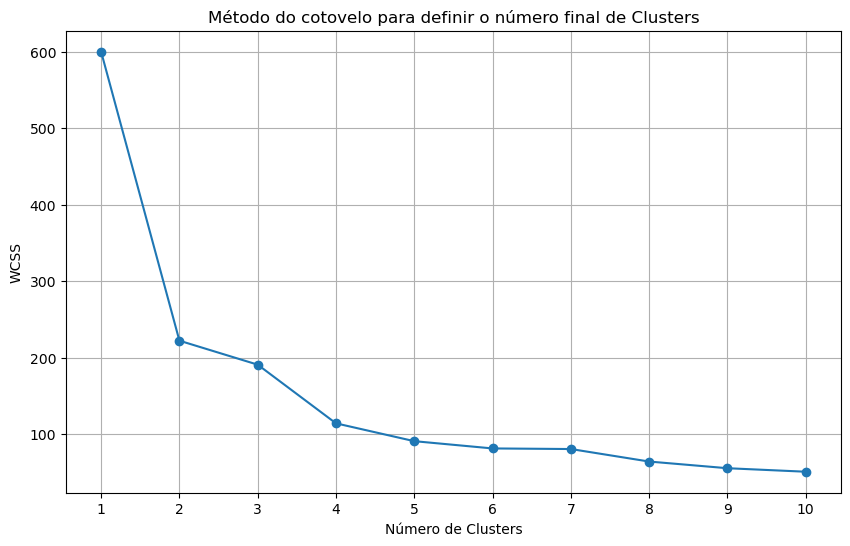

In [24]:
# Plotar o gráfico de WCSS
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Método do cotovelo para definir o número final de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

### **3.3. Visualização** 

**a)** Utilizando o número de clusters final, adicione uma coluna chamada **cluster** no dataframe **iris** com o número do cluster que cada flor foi alocada.

In [20]:
# Escolher o número de clusters final
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(x_scaled)

# Adicionar a coluna de clusters ao dataframe original
df['cluster'] = kmeans.labels_

print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species  cluster
0           5.1          3.5           1.4          0.2  setosa        1
1           4.9          3.0           1.4          0.2  setosa        2
2           4.7          3.2           1.3          0.2  setosa        2
3           4.6          3.1           1.5          0.2  setosa        2
4           5.0          3.6           1.4          0.2  setosa        1


**b)** Gere a mesma visualização da sessão 1.1, agora passando como atributo **hue** a coluna **cluster**. Comente os resultados com base no valor esperado do número de clusters.

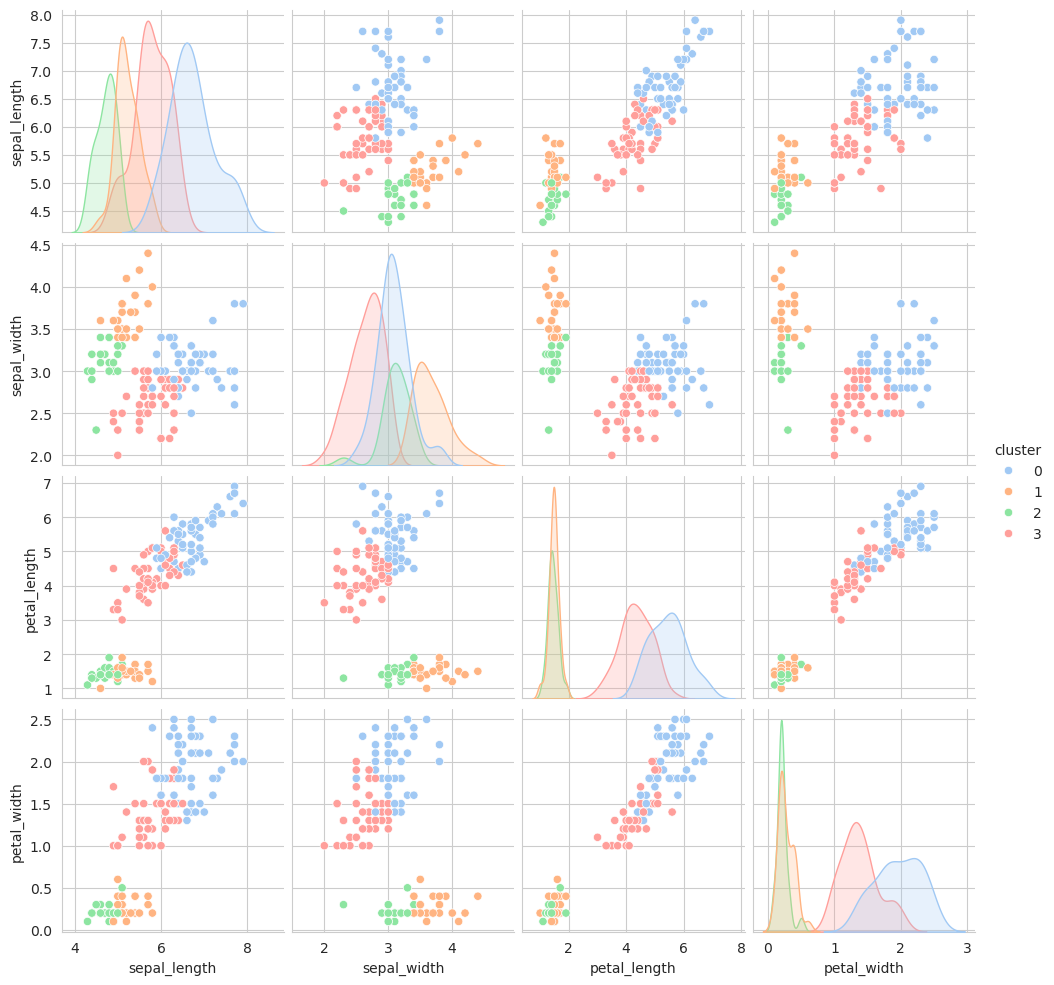

In [22]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=df, palette="pastel", hue='cluster')

**Comentário:** Observa-se que mesmo utilizando os clusters mais relevantes, ainda existe um agrupamento de informações que não auxilia na predição com acurácia elevada. Mas temos algumas características como a largura das sepálias que apresenta blocos bem ordenados. No entanto, o comprimento das pétalas faz o contrário.

## 4\. Predição  

### **4.1. Nova flor** 

Em qual cluster a flor abaixo seria alocada?


| sepal_length	| sepal_width | petal_length | petal_width |
| --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2.

In [23]:
# Ordenar dados em uma array
n_f = np.array([[5.1, 3.5, 1.4, 0.2]])

# Normalizar a nova amostra usando o mesmo scaler que foi usado para o treinamento
n_f_scaled = scaler.transform(n_f)

# Usar o modelo treinado para prever o cluster da nova flor
predicted_cluster = kmeans.predict(n_f_scaled)

print(f'A nova flor está no cluster {predicted_cluster[0]}')

A nova flor está no cluster 1


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


---